# Plotting Notebook 

This Jupyter Notebook contains the code used to create the following plots for this project:
- A horizontal bar chart of the word count for each author
- Precision-Recall Curves for TF-IDF and Word Embedding Features

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

import os


MAIN_DIR = f"{os.getcwd()}"

## Word Count Chart

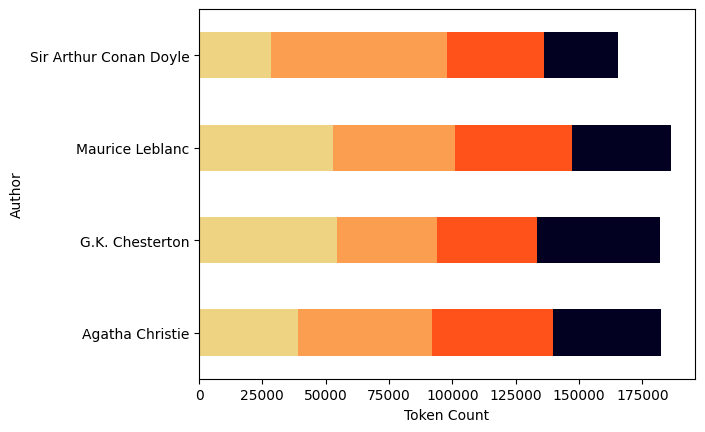

In [4]:
def get_csv_files(data_dir='data') -> str:
    '''
    Gets all the data.csv files for all works. 
    '''
    return glob.glob(f'{data_dir}/**/**/data.csv')

def create_meta_df():
    '''
    Create a dataframe containing metadata on all chapters of all works
    '''
    files = get_csv_files(f"{MAIN_DIR}/data")
    dfs = []
    for f in files:
        split_path = f.split('\\')[1:]
        sub_df = pd.read_csv(f)
        sub_df['author'] = split_path[-3]
        sub_df['book_name'] = split_path[-2]
        sub_df.drop(columns=['text'], inplace=True)
        dfs.append(sub_df)
    df = pd.concat(dfs)
    return df

def create_plot(save_figure=True):
    df = create_meta_df()
    df1 = df.groupby(["author", "book_name"])['wc'].sum().reset_index()

    for a in df1['author'].value_counts().index:
        df1.loc[df1['author'] == a,"t"] = range(1,5)
    t = pd.pivot_table(df1, values='wc', index='author',
                        columns=['t'], aggfunc="sum")
    t = t.loc[['agatha_christie', 'gk_chesterton','maurice_leblanc','sir_arthur_conan_doyle']]
    t = t.rename(index={'agatha_christie': 'Agatha Christie', 'gk_chesterton':'G.K. Chesterton','maurice_leblanc':'Maurice Leblanc','sir_arthur_conan_doyle':'Sir Arthur Conan Doyle'})
    p = t.plot(kind='barh', stacked=True, color=['#edd382', '#fc9e4f', '#FF521B', '#020122'])
    
    legend = plt.legend() # remove legend for visual clarity
    legend.remove()
    p.set_xlabel("Token Count")
    p.set_ylabel("Author")
    if save_figure:
        os.makedirs('plots', exist_ok=True)
        plt.savefig("plots/wc_by_author.svg")
        plt.savefig("plots/wc_by_author.png")
    plt.show()
create_plot()

## Precision-Recall Curves

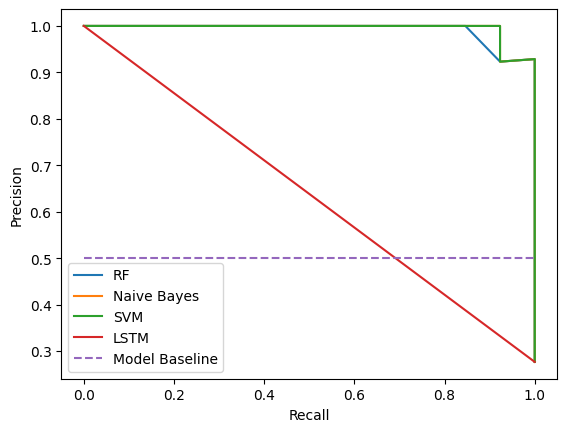

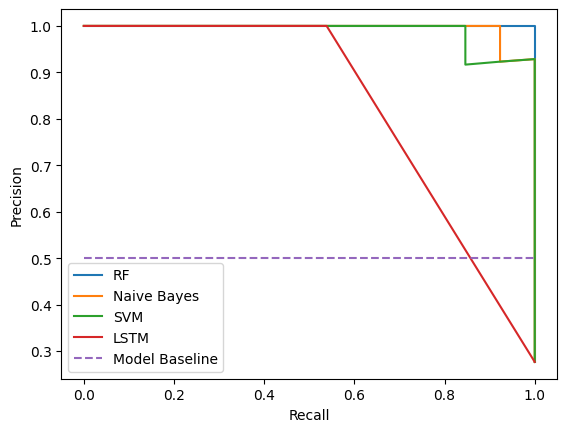

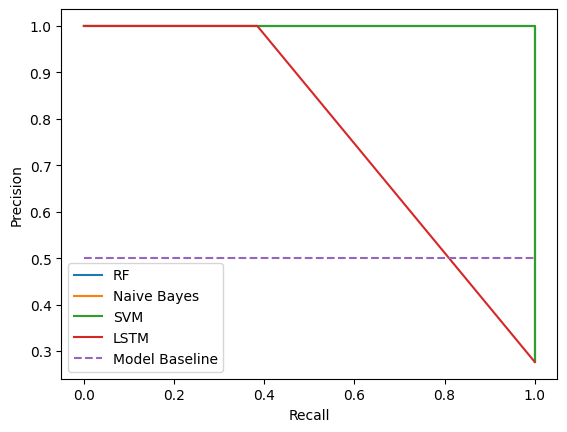

In [10]:
def create_pr_plots(save_figure=False):
    # get models for the optimal configuration (assumes data has already been generated)
    d = model_data([False, False, False, False, 300, False, False], return_pr=True)

    func_disp_names = {
        "rf": "RF", 
        "gaussian": "Naive Bayes", 
        "svm": "SVM", 
        "lstm": "LSTM"
    }

    for e in d:
        fig, ax = plt.subplots()
        for func, pr in d[e].items():
            ax.plot(pr[1],  pr[0], label=func_disp_names[func])
        ax.plot([0, 1], [0.5, 0.5], label='Model Baseline', linestyle='--')
        plt.legend()
        ax.set_xlabel("Recall")
        ax.set_ylabel("Precision")
        # ax.set_title(f"Precision-Recall of Models with {e} Features")
        if save_figure:
            os.makedirs('plots', exist_ok=True)
            plt.savefig(f"plots/pr_{e}.svg")
            plt.savefig(f"plots/pr_{e}.png")
        plt.show()
create_pr_plots()